# Python Project

Dataset: QSAR biodegradation : https://archive.ics.uci.edu/ml/datasets/QSAR+biodegradation

### Importation of the useful libraries

In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pd.set_option('display.max_column',42)

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

## Data exploration 

we see that the columns are unnamed so we need to fix that problem by adding the column names found on the site in a text file.

As the names of the columns are complicated, we take the opportunity to create a dictionnary to store the description of each each columns

In [4]:
description={}
file=open('description.txt','r')
for l in file:
    data=[str(d)for d in l.split(": ")]
    name=[str(n) for n in data[0].split(") ") ]
    descr=[str(des)for des in data[1].split("\n")]
    description[name[1]]=descr[0]
    
# as the given names are not significant at all, we use the description as names

names=[]
for key,value in description.items():
    names.append(value)
# exept for the target value which is too descriptive
names[-1]='experimental class'
names

['Leading eigenvalue from Laplace matrix',
 'Balaban-like index from Barysz matrix weighted by Sanderson electronegativity',
 'Number of heavy atoms',
 'Frequency of N-N at topological distance 1',
 'Frequency of C-N at topological distance 4',
 'Number of atoms of type ssssC',
 'Number of substituted benzene C(sp2)',
 'Percentage of C atoms',
 'Number of terminal primary C(sp3)',
 'Number of oxygen atoms',
 'Frequency of C-N at topological distance 3',
 'Sum of dssC E-states',
 'Hyper-Wiener-like index (log function) from Burden matrix weighted by mass',
 'Lopping centric index',
 'Spectral moment of order 6 from Laplace matrix',
 'Frequency of C - O at topological distance 3',
 'Mean atomic Sanderson electronegativity (scaled on Carbon atom)',
 'Mean first ionization potential (scaled on Carbon atom)',
 'Number of N hydrazines',
 'Number of nitro groups (aromatic)',
 'Number of CRX3',
 'Normalized spectral positive sum from Burden matrix weighted by polarizability',
 'Number of circu

In [5]:
data=pd.read_csv('biodeg.csv',names=names, delimiter=';')
df=data.copy()
# knowing the number of rows and column
print('the number of rows and colums are'+str(df.shape))




the number of rows and colums are(1055, 42)


In [5]:
print('\nthe columns are - \n')
[print(i) for i in df.columns.values]


the columns are - 

Leading eigenvalue from Laplace matrix
Balaban-like index from Barysz matrix weighted by Sanderson electronegativity
Number of heavy atoms
Frequency of N-N at topological distance 1
Frequency of C-N at topological distance 4
Number of atoms of type ssssC
Number of substituted benzene C(sp2)
Percentage of C atoms
Number of terminal primary C(sp3)
Number of oxygen atoms
Frequency of C-N at topological distance 3
Sum of dssC E-states
Hyper-Wiener-like index (log function) from Burden matrix weighted by mass
Lopping centric index
Spectral moment of order 6 from Laplace matrix
Frequency of C - O at topological distance 3
Mean atomic Sanderson electronegativity (scaled on Carbon atom)
Mean first ionization potential (scaled on Carbon atom)
Number of N hydrazines
Number of nitro groups (aromatic)
Number of CRX3
Normalized spectral positive sum from Burden matrix weighted by polarizability
Number of circuits
Presence/absence of C - Br at topological distance 1
Presence/abs

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

So we have 41 parameters for 1 response to predict

In [6]:
df.dtypes.value_counts()

int64      24
float64    17
object      1
dtype: int64

In [7]:
df.head()

,Leading eigenvalue from Laplace matrix,Balaban-like index from Barysz matrix weighted by Sanderson electronegativity,Number of heavy atoms,Frequency of N-N at topological distance 1,Frequency of C-N at topological distance 4,Number of atoms of type ssssC,Number of substituted benzene C(sp2),Percentage of C atoms,Number of terminal primary C(sp3),Number of oxygen atoms,Frequency of C-N at topological distance 3,Sum of dssC E-states,Hyper-Wiener-like index (log function) from Burden matrix weighted by mass,Lopping centric index,Spectral moment of order 6 from Laplace matrix,Frequency of C - O at topological distance 3,Mean atomic Sanderson electronegativity (scaled on Carbon atom),Mean first ionization potential (scaled on Carbon atom),Number of N hydrazines,Number of nitro groups (aromatic),Number of CRX3,Normalized spectral positive sum from Burden matrix weighted by polarizability,Number of circuits,Presence/absence of C - Br at topological distance 1,Presence/absence of C - Cl at topological distance 3,Ar2NH / Ar3N / Ar2N-Al / R..N..R,Leading eigenvalue from adjacency matrix (Lovasz-Pelikan index),Intrinsic state pseudoconnectivity index - type 1d,Presence/absence of C - Br at topological distance 4,Sum of dO E-states,Second Mohar index from Laplace matrix,Number of ring tertiary C(sp3),R--CX--R,Frequency of C - N at topological distance 2,Number of donor atoms for H-bonds (N and O),Leading eigenvalue from Burden matrix weighted by mass,Intrinsic state pseudoconnectivity index - type S average,Number of Nitrogen atoms,Spectral moment of order 6 from Burden matrix weighted by mass,Number of esters (aromatic),Number of halogen atoms,experimental class
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,0,0.000,3.106,2.550,9.002,0,0.960,1.142,0,0,0,1.201,0,0,0,0,1.932,0.011,0,0.000,4.489,0,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,RB
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,RB
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,RB


**Missing values**

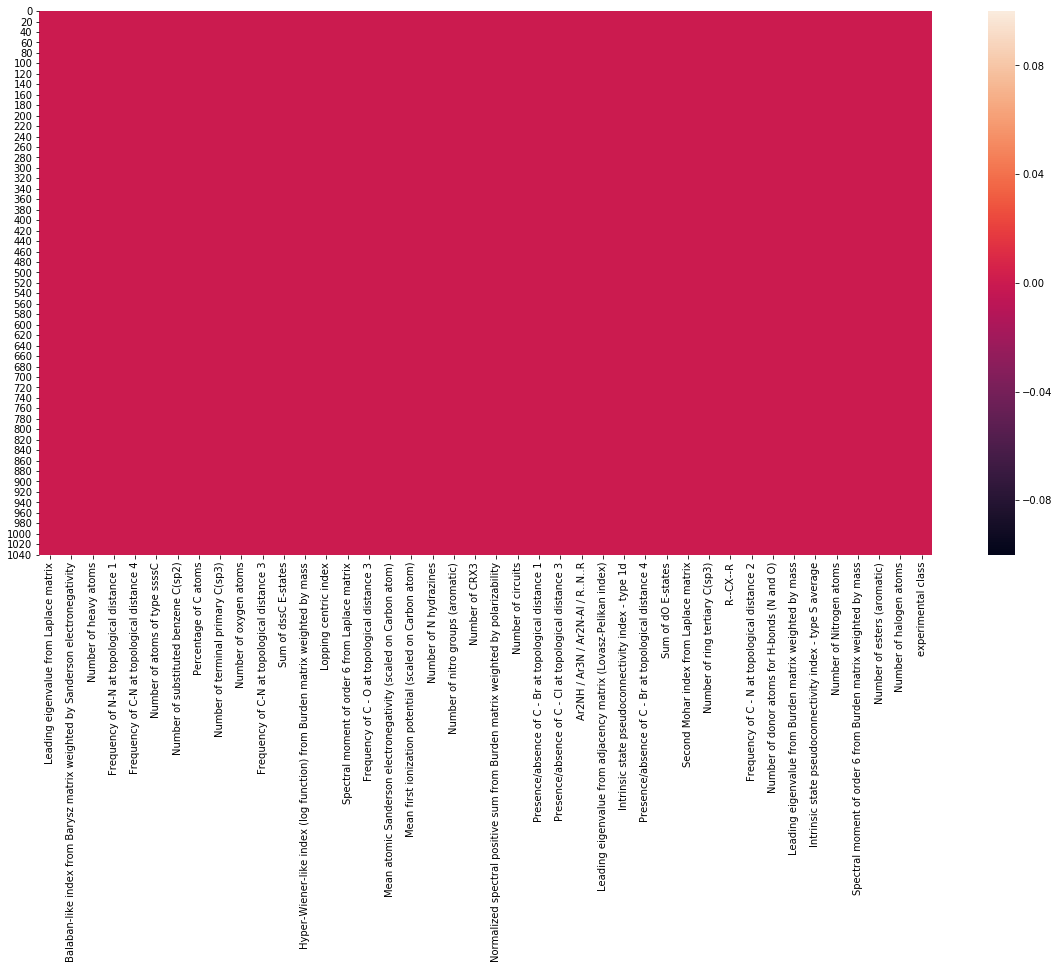

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna())

### Content analysis

**Target visualisation**

In [86]:
df['experimental class'].value_counts(normalize=True)

NRB    0.662559
RB     0.337441
Name: experimental class, dtype: float64

**Continuous variables vizualisation**

In [10]:
print(df.select_dtypes('float64').columns)
    

Index(['Leading eigenvalue from Laplace matrix',
       'Balaban-like index from Barysz matrix weighted by Sanderson electronegativity',
       'Percentage of C atoms', 'Sum of dssC E-states',
       'Hyper-Wiener-like index (log function) from Burden matrix weighted by mass',
       'Lopping centric index',
       'Spectral moment of order 6 from Laplace matrix',
       'Mean atomic Sanderson electronegativity (scaled on Carbon atom)',
       'Mean first ionization potential (scaled on Carbon atom)',
       'Normalized spectral positive sum from Burden matrix weighted by polarizability',
       'Leading eigenvalue from adjacency matrix (Lovasz-Pelikan index)',
       'Intrinsic state pseudoconnectivity index - type 1d',
       'Sum of dO E-states', 'Second Mohar index from Laplace matrix',
       'Leading eigenvalue from Burden matrix weighted by mass',
       'Intrinsic state pseudoconnectivity index - type S average',
       'Spectral moment of order 6 from Burden matrix weighted by

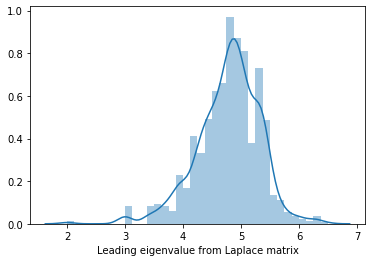

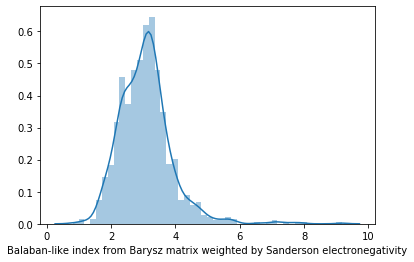

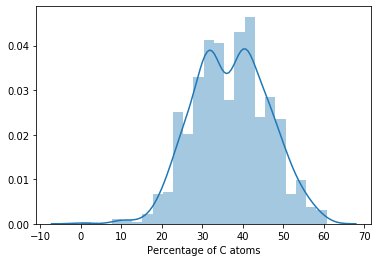

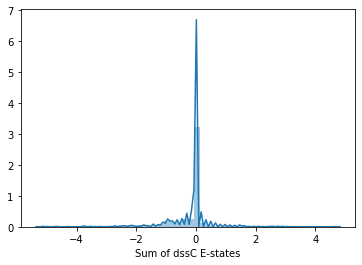

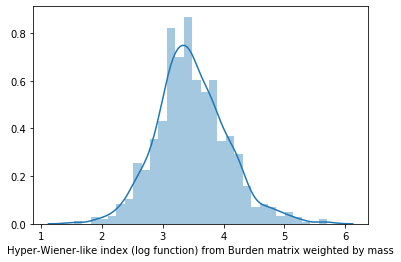

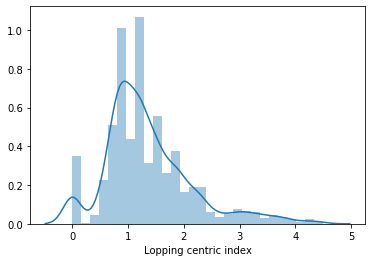

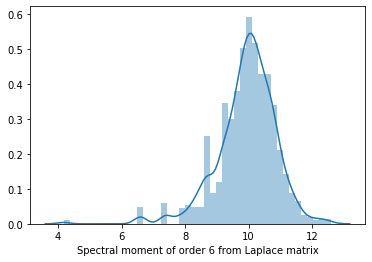

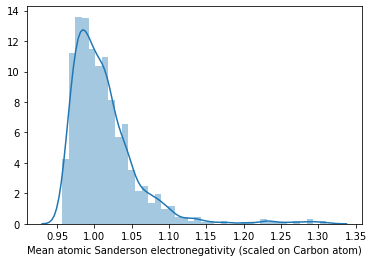

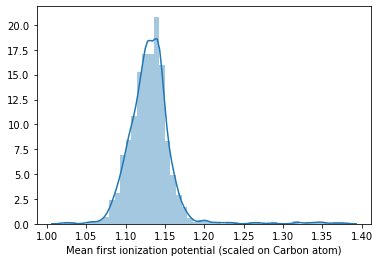

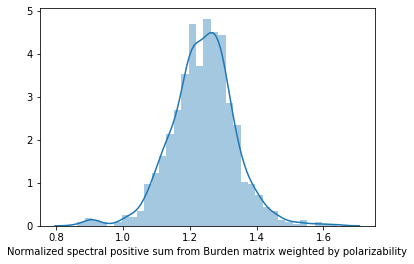

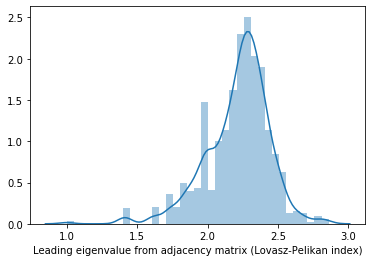

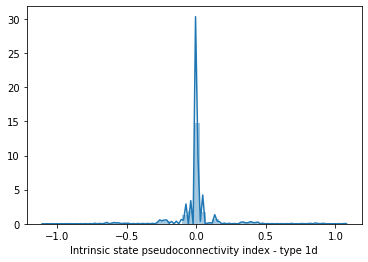

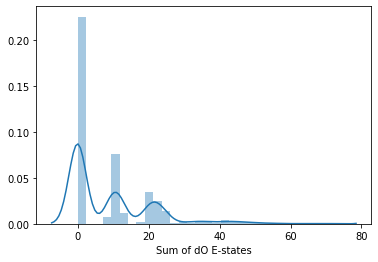

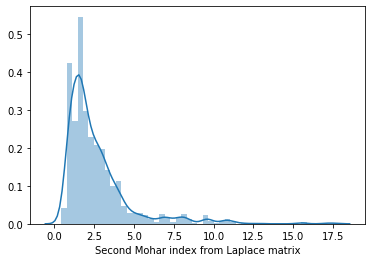

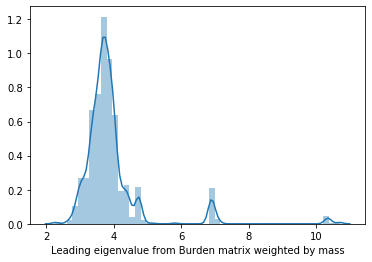

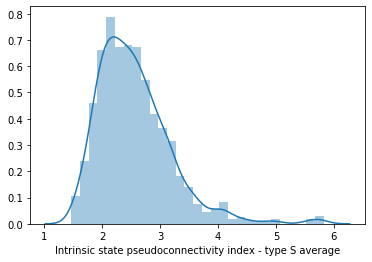

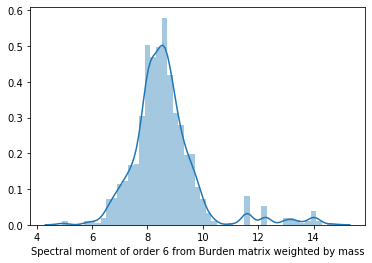

In [11]:
for col in df.select_dtypes('float64'):
    plt.figure()
    sns.distplot(df[col])

**Integer variables visualization**

Some of the integers parameters can be considered as categorical variables while others as quantitative.
We will try to figure out which belong to which category.

In [12]:
for col in df.select_dtypes('int64'):
    print(f'{col:-<60} {len(df[col].unique())}')

Number of heavy atoms--------------------------------------- 11
Frequency of N-N at topological distance 1------------------ 4
Frequency of C-N at topological distance 4------------------ 16
Number of atoms of type ssssC------------------------------- 13
Number of substituted benzene C(sp2)------------------------ 15
Number of terminal primary C(sp3)--------------------------- 15
Number of oxygen atoms-------------------------------------- 12
Frequency of C-N at topological distance 3------------------ 21
Frequency of C - O at topological distance 3---------------- 24
Number of N hydrazines-------------------------------------- 3
Number of nitro groups (aromatic)--------------------------- 4
Number of CRX3---------------------------------------------- 4
Number of circuits------------------------------------------ 13
Presence/absence of C - Br at topological distance 1-------- 2
Presence/absence of C - Cl at topological distance 3-------- 2
Ar2NH / Ar3N / Ar2N-Al / R..N..R--------------

### Relation target/variable

**Subset-creation**

Subsets for the 2 categories of the target

In [87]:
RB_df=df[df['experimental class']=="RB"]
NRB_df=df[df['experimental class']=="NRB"]

Subsets for the categories of variable we identified earlier
We make a function to return the names of the column containing a keyword "name"

In [6]:
def col_by_name(dataframe,name):
    res=[]
    for col in dataframe.columns:
        if name.lower() in col.lower():
            res.append(col)
    return res

In [88]:
col_number_atoms=col_by_name(df,'number')

In [89]:
col_frequency=col_by_name(df,'frequency')

In [90]:
col_presence_absence=col_by_name(df,'presence')

Subsets for different categories of continuous variable we identified earlier too

In [91]:
col_Laplace_Matrix=col_by_name(df,'Laplace')

In [92]:
col_Burden_Matrix=col_by_name(df,'Burden')

**Target/number of atoms**

C:\Users\flore\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\flore\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


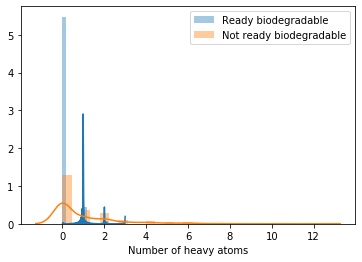

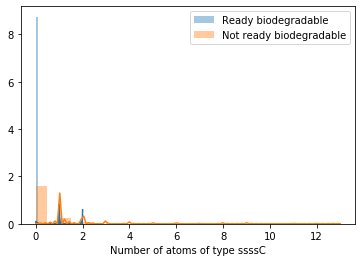

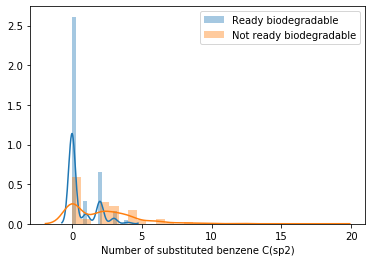

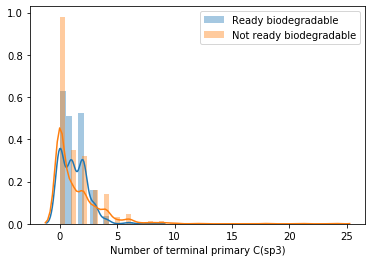

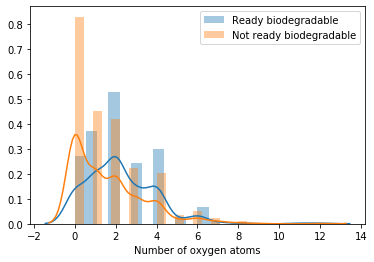

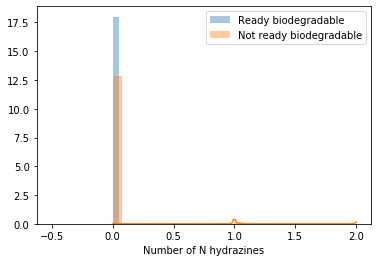

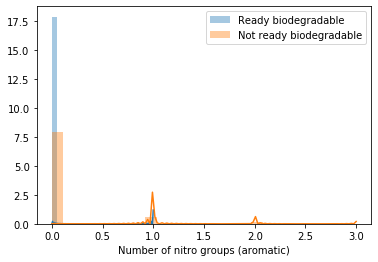

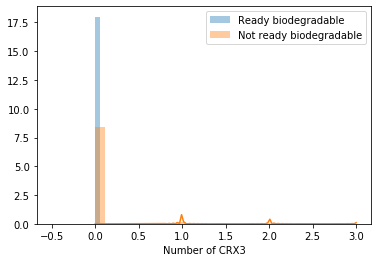

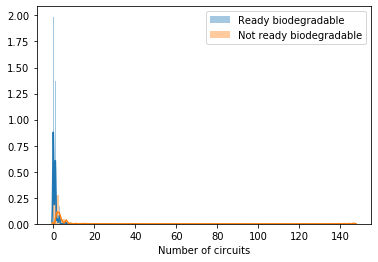

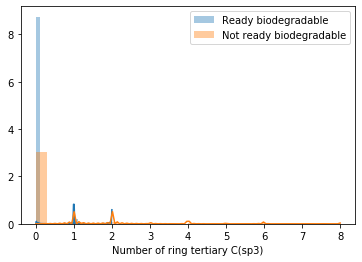

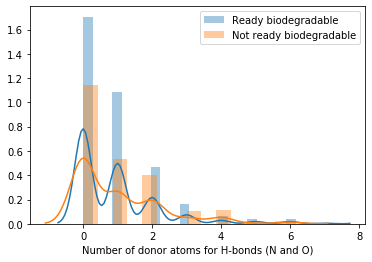

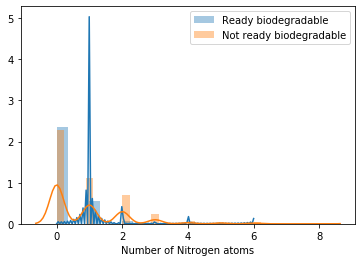

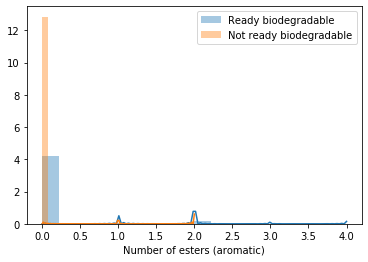

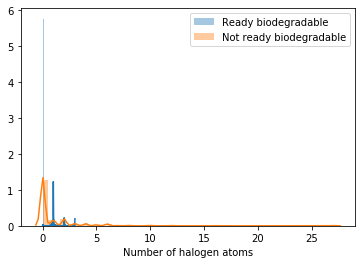

In [20]:
for col in col_number_atoms:
    plt.figure()
    sns.distplot(RB_df[col], label='Ready biodegradable')
    sns.distplot(NRB_df[col], label='Not ready biodegradable')
    plt.legend()
    
    

**Target/ frequency of bond**

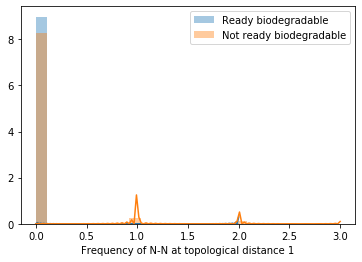

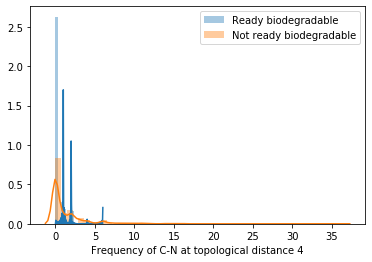

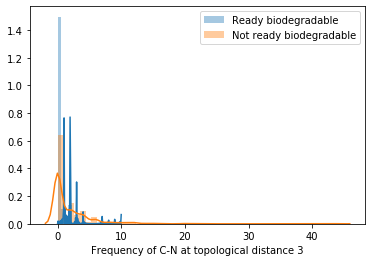

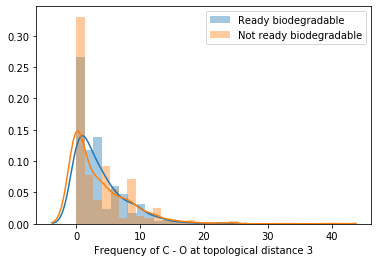

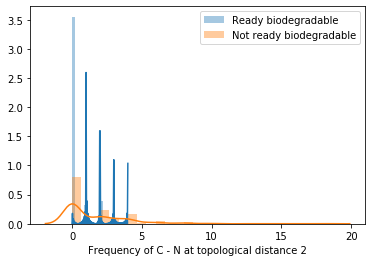

In [21]:
for col in col_frequency:
    plt.figure()
    sns.distplot(RB_df[col], label='Ready biodegradable')
    sns.distplot(NRB_df[col], label='Not ready biodegradable')
    plt.legend()

**Target/ presence/absence**

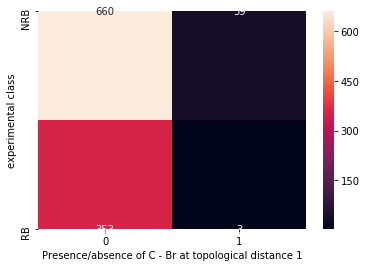

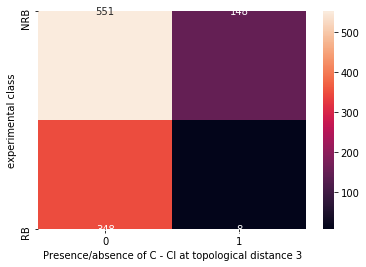

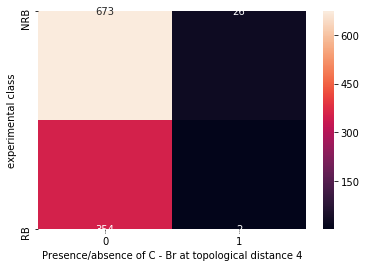

In [22]:
for col in col_presence_absence:
    plt.figure()
    sns.heatmap(pd.crosstab(df['experimental class'],df[col]),annot=True,fmt='d')

It could be interesting to see if the presence of any bond have an impact

In [93]:
df['presence of special bond']=np.sum(df[col_presence_absence]==1,axis=1)>=1
col_presence_absence.append('presence of special bond')

In [94]:
# uptading our subsets:
RB_df=df[df['experimental class']=="RB"]
NRB_df=df[df['experimental class']=="NRB"]

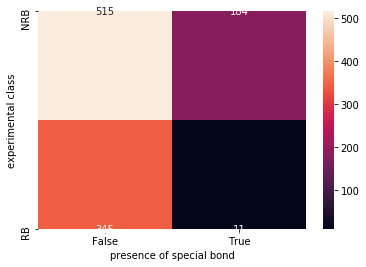

In [24]:
sns.heatmap(pd.crosstab(df['experimental class'],df['presence of special bond']),annot=True,fmt='d')

**Other variables**

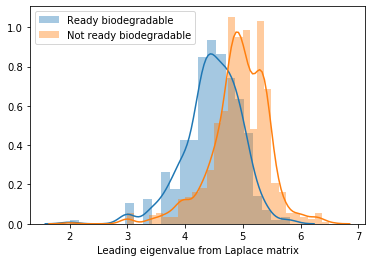

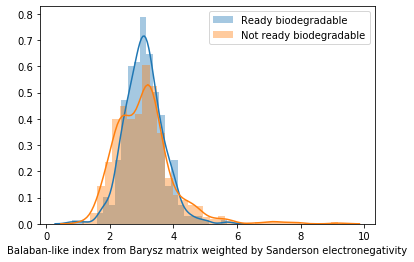

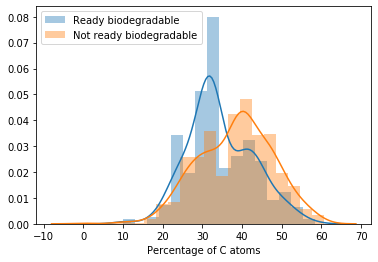

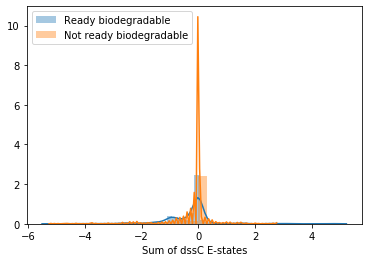

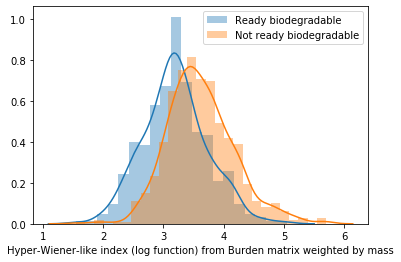

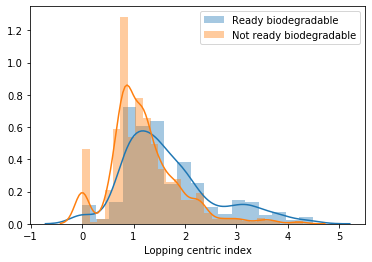

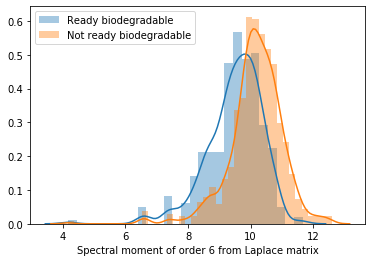

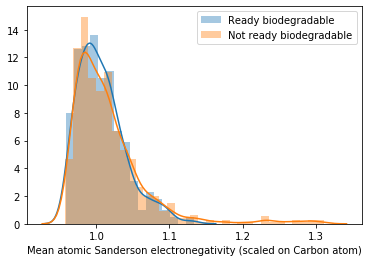

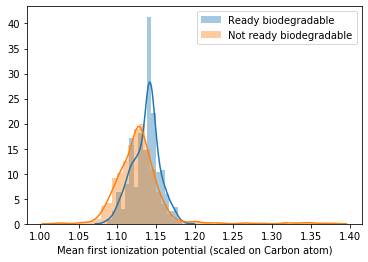

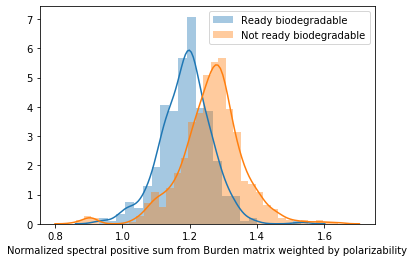

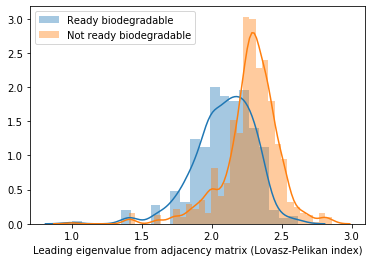

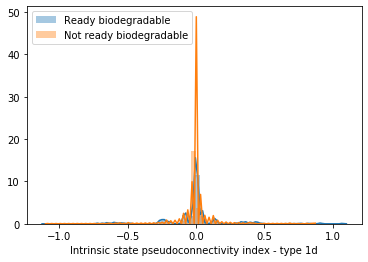

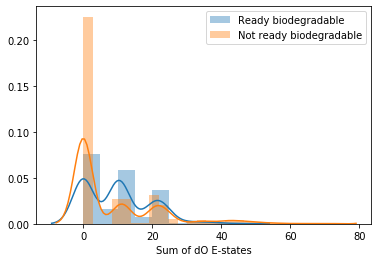

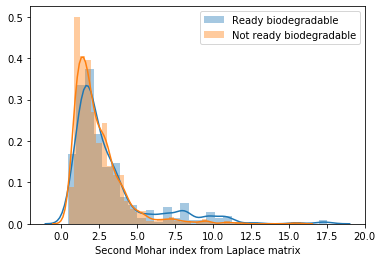

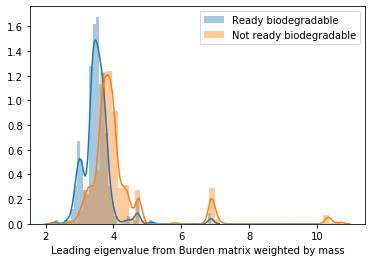

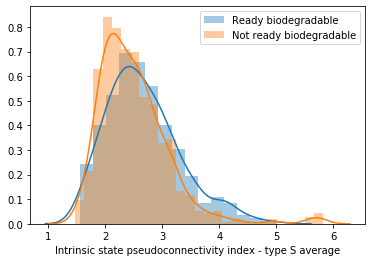

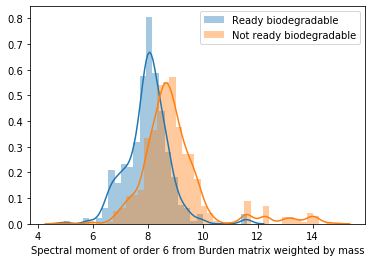

In [25]:
for col in df.select_dtypes('float64'):
    plt.figure()
    sns.distplot(RB_df[col], label='Ready biodegradable')
    sns.distplot(NRB_df[col], label='Not ready biodegradable')
    plt.legend()

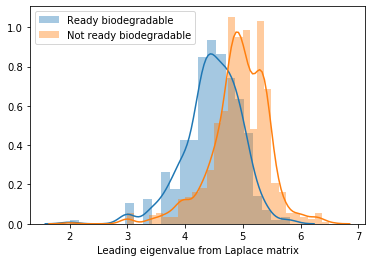

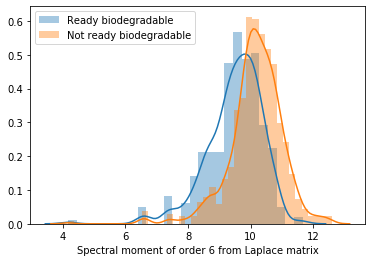

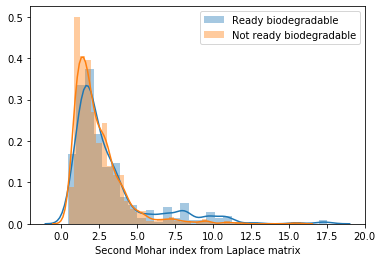

In [26]:
for col in col_Laplace_Matrix:
    plt.figure()
    sns.distplot(RB_df[col], label='Ready biodegradable')
    sns.distplot(NRB_df[col], label='Not ready biodegradable')
    plt.legend()

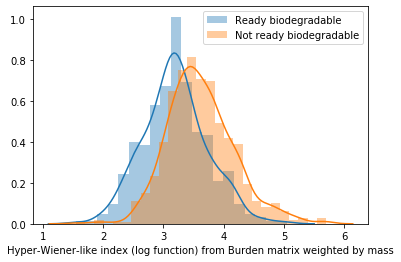

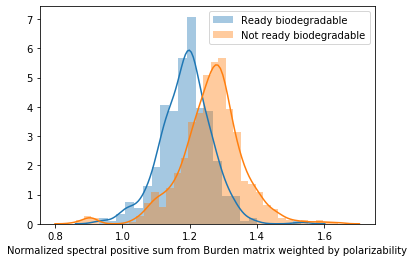

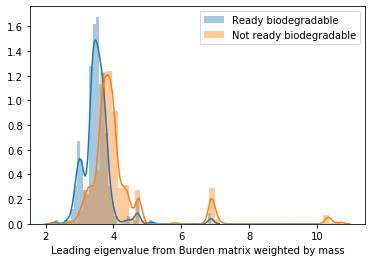

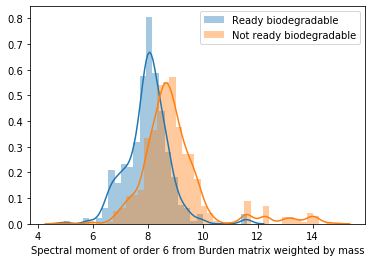

In [27]:
for col in col_Burden_Matrix:
    plt.figure()
    sns.distplot(RB_df[col], label='Ready biodegradable')
    sns.distplot(NRB_df[col], label='Not ready biodegradable')
    plt.legend()

### Parameter/Parameter analysis

Analysis of potential relations between the parameters.

**Relation between the number of different number of atoms :**

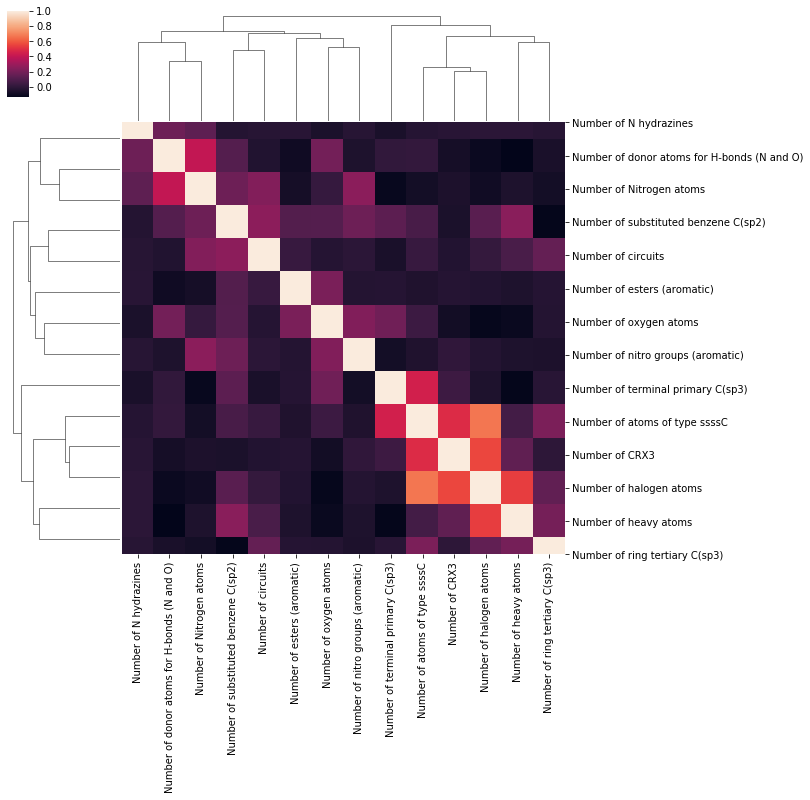

In [28]:
sns.clustermap(df[col_number_atoms].corr())

**Relation among the presence/absence of different bond:**

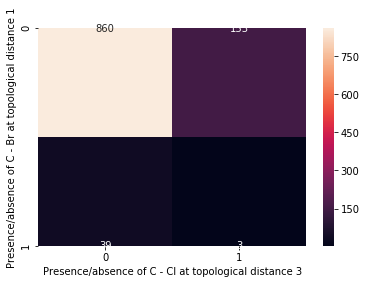

In [29]:
plt.figure()
sns.heatmap(pd.crosstab(df[col_presence_absence[0]],df[col_presence_absence[1]]),annot=True,fmt='d')

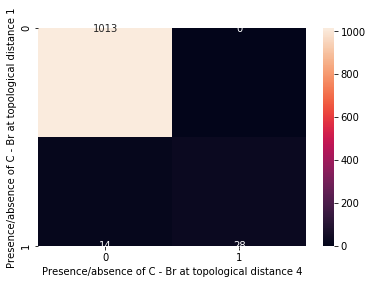

In [30]:
plt.figure()
sns.heatmap(pd.crosstab(df[col_presence_absence[0]],df[col_presence_absence[2]]),annot=True,fmt='d')


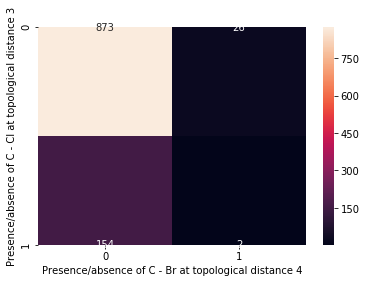

In [31]:
plt.figure()
sns.heatmap(pd.crosstab(df[col_presence_absence[1]],df[col_presence_absence[2]]),annot=True,fmt='d')

**Relation presence of bonds/ number of atoms:**

creation of new subsets to test it

In [95]:
presence_df=df[df['presence of special bond']==True]
absence_df=df[df['presence of special bond']==False]

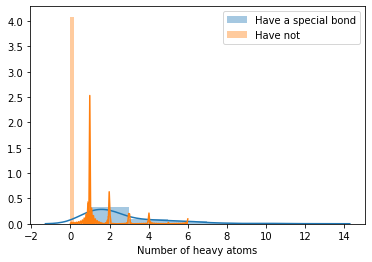

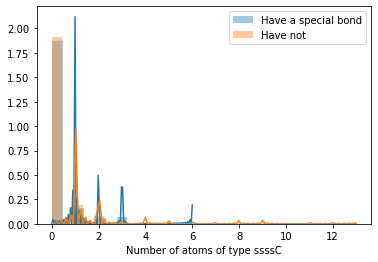

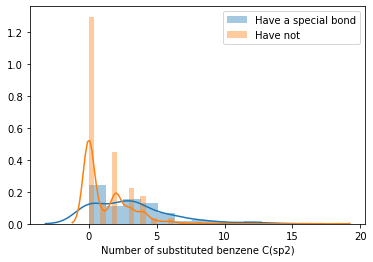

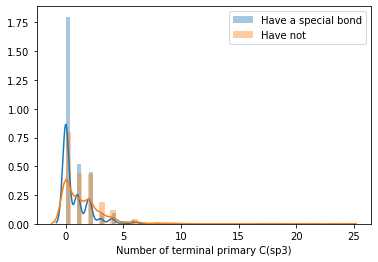

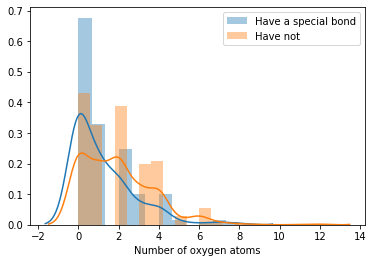

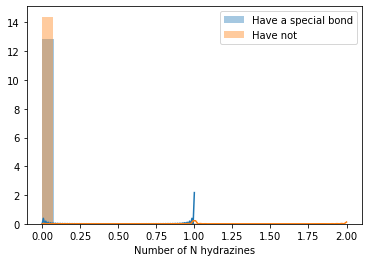

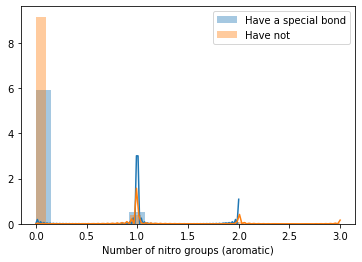

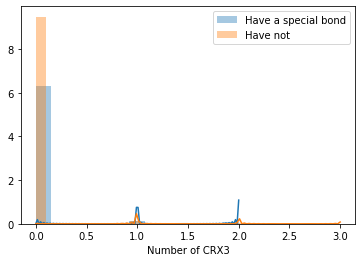

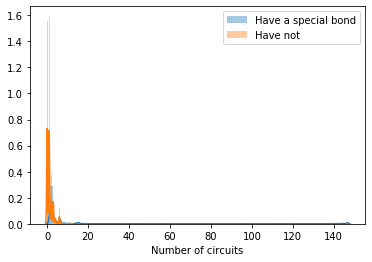

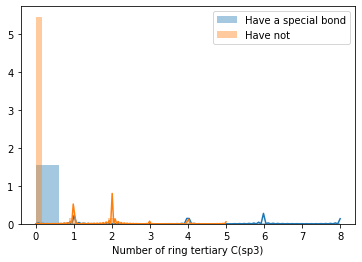

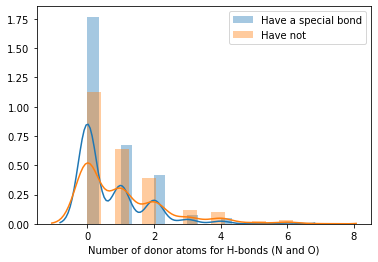

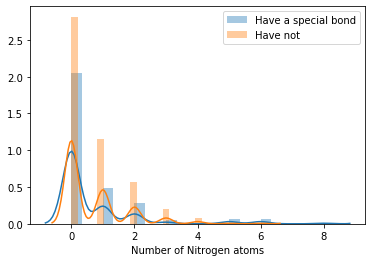

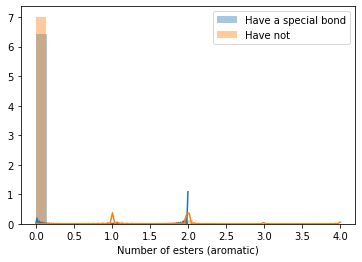

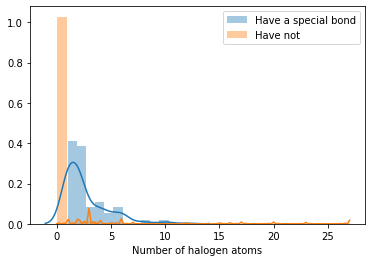

In [33]:
for col in col_number_atoms:
    plt.figure()
    sns.distplot(presence_df[col], label='Have a special bond')
    sns.distplot(absence_df[col], label='Have not')
    plt.legend()

**Relation frequency/frequency**

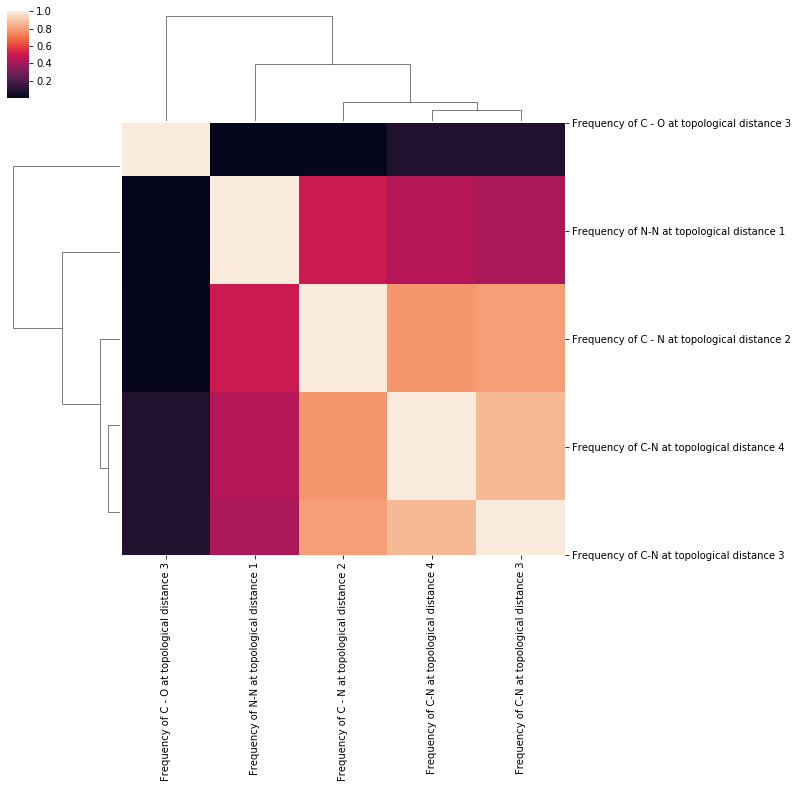

In [36]:
sns.clustermap(df[col_frequency].corr())

**Relation between the different indexes**

In [41]:
col_indexes=col_by_name(df,'index')

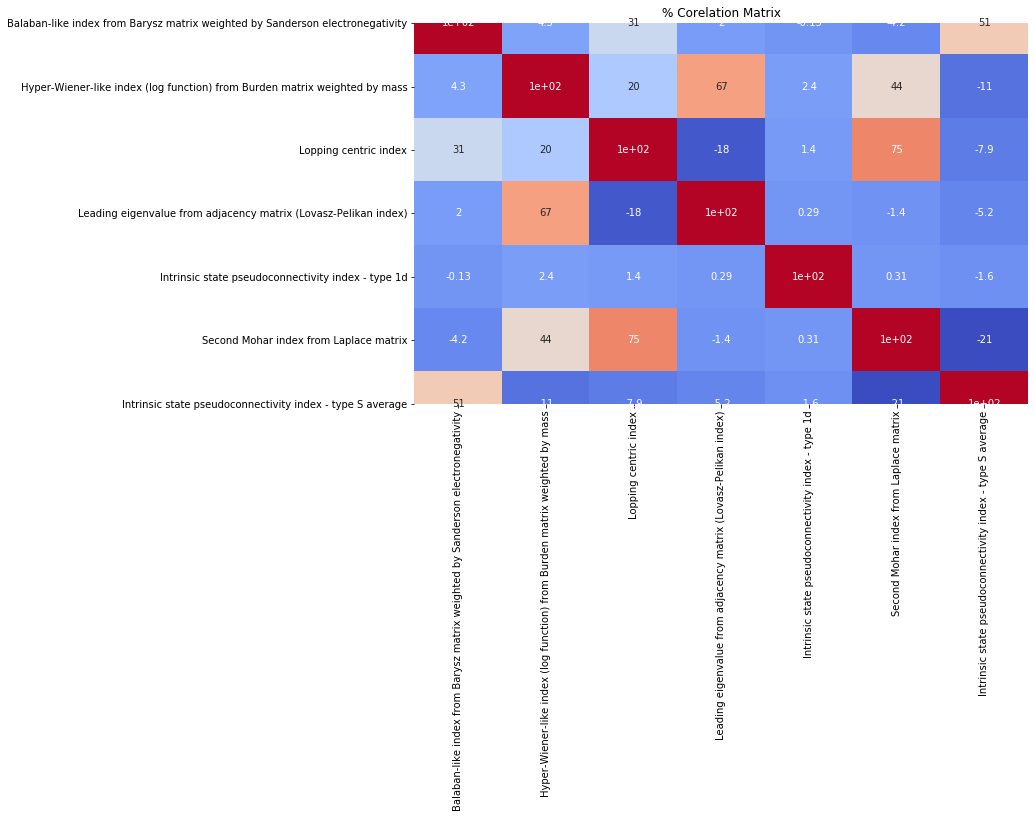

In [43]:
plt.figure(figsize=(11,7))
sns.heatmap(cbar=False,annot=True,data=df[col_indexes].corr()*100,cmap='coolwarm')
plt.title('% Corelation Matrix')
plt.show()

### Null Hypothesis

H0: the number of different atoms is the same for a ready and a not ready biodegradable mollecula

**Student test :**

In [44]:
from scipy.stats import ttest_ind

to do the test we need samples from the two categories RB and NRB that are the same size.
For that we sample the largest subset to match the heigth of the smallest.
Here, the size of RB_df is 356 ind. against 699 for the NRB df, so we will reduce the latter.

In [57]:
balanced_NRB_df=NRB_df.sample(RB_df.shape[0])
balanced_NRB_df.shape

(356, 43)

In [79]:
def t_test(col):
    alpha=0.001
    stat, p=ttest_ind(balanced_NRB_df[col],RB_df[col])
    if p<alpha:
        return 'H0 rejected, p= '+str(p)
    else:
        return 0

In [80]:
for col in col_number_atoms:
    print(f'{col:-<60}{t_test(col)}')

Number of heavy atoms---------------------------------------H0 rejected, p= 9.31285872295461e-23
Number of atoms of type ssssC-------------------------------H0 rejected, p= 1.3880091109864658e-10
Number of substituted benzene C(sp2)------------------------H0 rejected, p= 2.8973175283177195e-26
Number of terminal primary C(sp3)---------------------------0
Number of oxygen atoms--------------------------------------H0 rejected, p= 4.518249288144255e-06
Number of N hydrazines--------------------------------------0
Number of nitro groups (aromatic)---------------------------H0 rejected, p= 1.152904974101462e-06
Number of CRX3----------------------------------------------0
Number of circuits------------------------------------------H0 rejected, p= 0.0005165128021491878
Number of ring tertiary C(sp3)------------------------------H0 rejected, p= 6.356086776825845e-05
Number of donor atoms for H-bonds (N and O)-----------------0
Number of Nitrogen atoms------------------------------------H0 re

**Relation presence of bonds/target**

We will test that hypothesis with a Chi 2 test.
For that we need the contingency matrix :

In [60]:
from scipy.stats import chi2_contingency

In [83]:
def chi2_test(col):
    alpha=0.001
    X=col
    Y='experimental class'
    cont=df[[X,Y]].pivot_table(index=X,columns=Y, aggfunc=len).copy().astype(int)
    st_chi2, p, st_dof, st_exp = chi2_contingency(cont)
    if p<alpha:
        return 'H0 rejected, p= '+str(p)
    else:
        return 0

In [84]:
for col in col_presence_absence:
    print(f'{col:-<60}{chi2_test(col)}')

Presence/absence of C - Br at topological distance 1--------H0 rejected, p= 0.0003790067042238657
Presence/absence of C - Cl at topological distance 3--------H0 rejected, p= 5.642946716015212e-16
Presence/absence of C - Br at topological distance 4--------0
presence of special bond------------------------------------H0 rejected, p= 8.338169276220103e-20


## Preprocessing

In [35]:
df=data.copy()

**Creation of training/testing set**

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
target='experimental class'

In [36]:
trainset,testset=train_test_split(df,test_size=0.2, random_state=1)

We check that we keep almost the same repartition

In [10]:
trainset[target].value_counts(normalize=True)

NRB    0.671801
RB     0.328199
Name: experimental class, dtype: float64

In [11]:
testset[target].value_counts(normalize=True)

NRB    0.625592
RB     0.374408
Name: experimental class, dtype: float64

**Encryption**

In [12]:
def encryption(df):
    code={'RB':1,'NRB':0, True:1, False:0}
    for col in df.select_dtypes(include=['object','bool']).columns:
        df.loc[:,col]=df[col].map(code)
    return df

In [13]:
def feature_engineering(df):
    col_presence_absence=col_by_name(df,'presence')
    col_number=col_by_name(df,'number')
    df['number total atoms']=np.sum(df[col_number],axis=1)
    df['presence of special bond']=np.sum(df[col_presence_absence]==1,axis=1)>=1
    df= df.drop(col_presence_absence, axis=1)
    df= df.drop(col_number, axis=1)
    return df

In [14]:
def preprocessing(df):
    
    #df=feature_engineering(df)
    df=encryption(df)
    
    X=df.drop('experimental class', axis=1)
    y=df['experimental class']
    
    print(y.value_counts())
    return X,y

In [40]:
X_train, y_train=preprocessing(trainset)

0    567
1    277
Name: experimental class, dtype: int64


In [16]:
X_test, y_test=preprocessing(testset)

0    132
1     79
Name: experimental class, dtype: int64


### First model

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.linear_model import SGDClassifier

In [46]:
Scaler=StandardScaler()
first_model=DecisionTreeClassifier(random_state=0)

### Evaluation process

In [23]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [24]:
def evaluation(model):
    # computing the model
    model.fit(X_train,y_train)
    ypred=model.predict(X_test)
    # displaying the recall, f1_score and accuracy
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test,ypred))
    # displaying the learning curves
    N, train_score, val_score= learning_curve(model, X_train, y_train,scoring='f1',
                                              cv=4, train_sizes=np.linspace(0.1,1,10))
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1))
    plt.plot(N, val_score.mean(axis=1))
    
    

[[118  14]
 [ 22  57]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       132
           1       0.80      0.72      0.76        79

    accuracy                           0.83       211
   macro avg       0.82      0.81      0.81       211
weighted avg       0.83      0.83      0.83       211



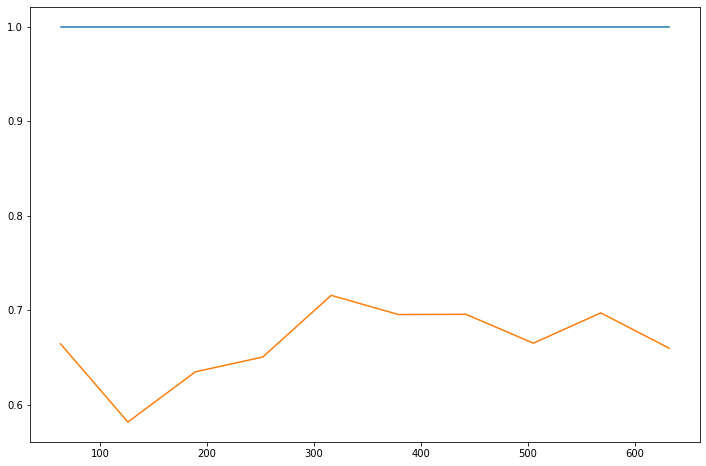

In [47]:
evaluation(first_model)

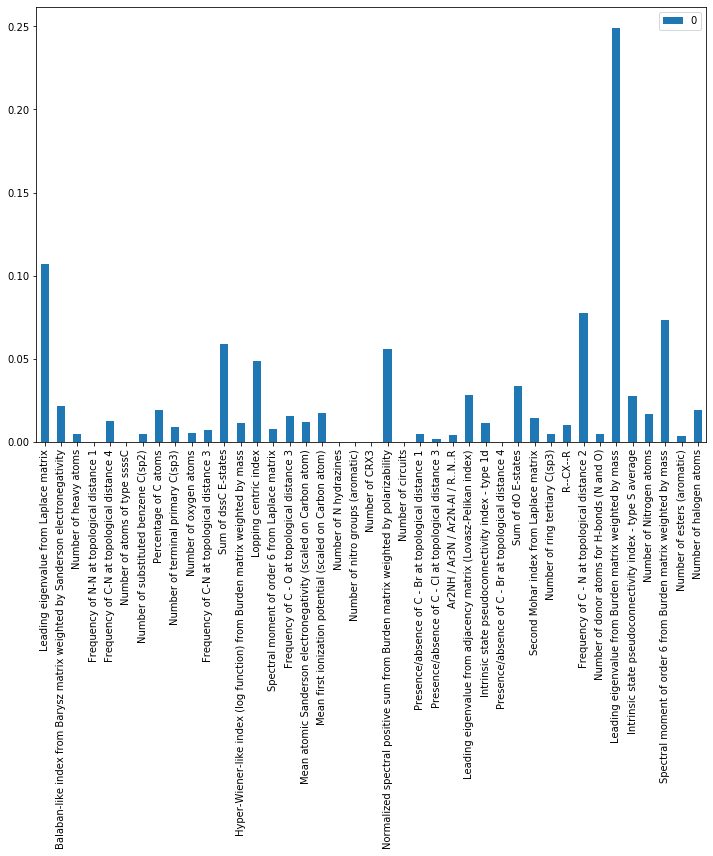

In [48]:
pd.DataFrame(first_model.feature_importances_,index = X_train.columns).plot.bar(figsize=(12,8))

### Feature selection

In [42]:
selector = RFECV(SGDClassifier(random_state=0),
                step=1,
                min_features_to_select=10,
                cv=5)
selector.fit(X_train,y_train)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5,
       1, 1, 1, 1, 1, 4, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [49]:
model=make_pipeline(selector,SGDClassifier(random_state=0))

[[120  12]
 [ 28  51]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       132
           1       0.81      0.65      0.72        79

    accuracy                           0.81       211
   macro avg       0.81      0.78      0.79       211
weighted avg       0.81      0.81      0.81       211



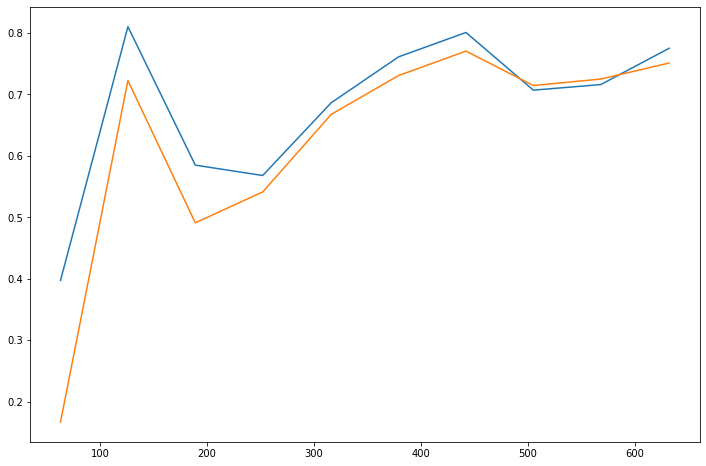

In [50]:
evaluation(model)